# 02 - Creazione indice

In [114]:
import pandas as pd
import numpy as np
from numpy import log
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from requests import get
from io import StringIO
from sklearn import preprocessing
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [115]:
url = 'https://docs.google.com/spreadsheets/d/1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM/export?format=csv&id=1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM&gid=2001946666'
r = get(url)
data = r.content.decode('utf-8')

df = pd.read_csv(StringIO(data))
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_2017_CL,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,4,3,124,64,42,23,13,7,7.96,180000000
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,6,3,369,219,135,53,32,23,8.41,180000000
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,6,2,657,573,229,129,106,28,8.71,180000000
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,10,5,328,135,77,34,16,6,7.61,150000000
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,7,2,317,182,43,16,13,3,7.32,150000000


In [116]:
df.columns

Index(['nome', 'nome_chiave', 'eta', 'ruolo', 'ruolo_dettaglio', 'squadra',
       'nazione_squadra', 'nazione_giocatore', 'instagram_followers',
       'facebook_followers', 'twitter_followers', 'insta_likes_avg',
       'google_hits', 'google_hits_1', 'wiki_visual', 'insta_hashtag',
       'GER_kicker', 'GER_bild_G', 'GER_eurosport_G', 'ITA_corriere',
       'ITA_sky_G', 'ITA_gazzetta_G', 'ENG_thesun', 'ENG_sky_G',
       'ENG_guardian_G', 'SPA_marca', 'SPA_as_G', 'SPA_mundodep_G',
       'FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G',
       'FRA_le10sport_G', 'INT_eurosport_G', 'INT_espn_G', 'INT_bein_G',
       'pres_2018_tot', 'goal_2018_tot', 'assist_2018_tot', 'pres_2018_CL',
       'goal_2018_CL', 'assist_2018_CL', 'pres_2017_tot', 'goal_2017_tot',
       'assist_2017_tot', 'pres_2017_CL', 'goal_2017_CL', 'assist_2017_CL',
       'pres_tot', 'goal_tot', 'assist_tot', 'pres_tot_CL', 'goal_tot_CL',
       'assist_tot_CL', 'whoscored1819', 'valore'],
      dtype='obje

In [117]:
def Normalize(df):
    n = df.shape[1]
    c = df.columns
    o = pd.DataFrame(columns=c)
    for i in range(n):
        x = df.iloc[:, i].values
        z = (x-x.min())/(x.max()-x.min())
        o[c[i]] = z
    return o

# DIMENSIONE MEDIA

In [118]:
df.columns

Index(['nome', 'nome_chiave', 'eta', 'ruolo', 'ruolo_dettaglio', 'squadra',
       'nazione_squadra', 'nazione_giocatore', 'instagram_followers',
       'facebook_followers', 'twitter_followers', 'insta_likes_avg',
       'google_hits', 'google_hits_1', 'wiki_visual', 'insta_hashtag',
       'GER_kicker', 'GER_bild_G', 'GER_eurosport_G', 'ITA_corriere',
       'ITA_sky_G', 'ITA_gazzetta_G', 'ENG_thesun', 'ENG_sky_G',
       'ENG_guardian_G', 'SPA_marca', 'SPA_as_G', 'SPA_mundodep_G',
       'FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G',
       'FRA_le10sport_G', 'INT_eurosport_G', 'INT_espn_G', 'INT_bein_G',
       'pres_2018_tot', 'goal_2018_tot', 'assist_2018_tot', 'pres_2018_CL',
       'goal_2018_CL', 'assist_2018_CL', 'pres_2017_tot', 'goal_2017_tot',
       'assist_2017_tot', 'pres_2017_CL', 'goal_2017_CL', 'assist_2017_CL',
       'pres_tot', 'goal_tot', 'assist_tot', 'pres_tot_CL', 'goal_tot_CL',
       'assist_tot_CL', 'whoscored1819', 'valore'],
      dtype='obje

In [119]:
# Germania

cols1=['GER_bild_G', 'GER_eurosport_G', 'GER_kicker']
X = Normalize(log(df[cols1]))
df['Germania'] = X.mean(axis=1)

# Francia

cols1=['FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G']
X = Normalize(log(df[cols1]))
df['Francia'] = X.mean(axis=1)

# Italia

cols1=['ITA_corriere', 'ITA_sky_G', 'ITA_gazzetta_G']
X = Normalize(log(df[cols1]))
df['Italia'] = X.mean(axis=1)

# Spagna

cols1=['SPA_marca', 'SPA_as_G', 'SPA_mundodep_G']
X = Normalize(log(df[cols1]))
df['Spagna'] = X.mean(axis=1)

# Inghilterra

cols1=['ENG_thesun', 'ENG_guardian_G', 'ENG_sky_G']
X = Normalize(log(df[cols1]))
df['Inghilterra'] = X.mean(axis=1)

# Internazionale

cols1=['INT_eurosport_G', 'INT_espn_G', 'INT_bein_G']
X = Normalize(log(df[cols1]))
df['Internazionale'] = X.mean(axis=1)

In [120]:
df['MEDIA'] = (df.Germania+df.Francia+df.Italia+df.Spagna+df.Inghilterra+df.Internazionale)/6

In [121]:
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,assist_tot_CL,whoscored1819,valore,Germania,Francia,Italia,Spagna,Inghilterra,Internazionale,MEDIA
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,7,7.96,180000000,0.661297,0.964054,0.814640,0.674346,0.751444,0.847766,0.785591
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,23,8.41,180000000,0.878533,0.961669,0.888165,0.898381,0.842264,0.952035,0.903508
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,28,8.71,180000000,0.855078,0.962311,0.947850,1.000000,0.864732,0.980338,0.935052
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,6,7.61,150000000,0.682767,0.758272,0.867892,0.610127,0.866545,0.861211,0.774469
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,3,7.32,150000000,0.640757,0.626784,0.638071,0.670535,0.911609,0.786139,0.712316


In [148]:
from scipy.stats import ttest_ind

# italia

In [122]:
ITAita = df.loc[df.nazione_squadra == "Italia","Italia"]

In [123]:
ITAother = df.loc[df.nazione_squadra != "Italia","Italia"]

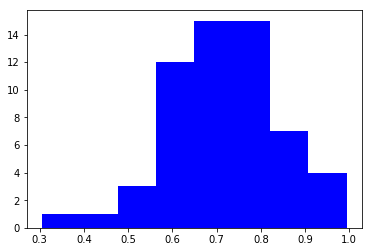

In [181]:
num_bins = 8
n, bins, patches = plt.hist(ITAita, num_bins, facecolor='blue')
plt.show()

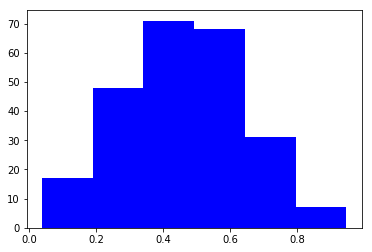

In [183]:
num_bins = 6
n, bins, patches = plt.hist(ITAother, num_bins, facecolor='blue')
plt.show()

In [124]:
np.median(ITAita), np.mean(ITAita)

(0.7298531783165041, 0.7196306635096099)

In [125]:
np.median(ITAother), np.mean(ITAother)

(0.4668159378016039, 0.45796574196808304)

In [127]:
ttest_ind(ITAita, ITAother)

Ttest_indResult(statistic=10.296483095801985, pvalue=1.8013034839673113e-21)

# francia

In [128]:
FRAfra = df.loc[df.nazione_squadra == "Francia","Francia"]

In [129]:
FRAother = df.loc[df.nazione_squadra != "Francia","Francia"]

In [130]:
np.median(FRAfra), np.mean(FRAfra)

(0.6928960638075372, 0.6797578858426897)

In [131]:
np.median(FRAother), np.mean(FRAother)

(0.4689847328133892, 0.4851552766315552)

In [132]:
ttest_ind(FRAfra,FRAother)

Ttest_indResult(statistic=4.897926101578335, pvalue=1.5911852456571526e-06)

# inghilterra

In [133]:
INGing = df.loc[df.nazione_squadra == "Inghilterra","Inghilterra"]

In [134]:
INGother = df.loc[df.nazione_squadra != "Inghilterra","Inghilterra"]

In [135]:
np.median(INGing), np.mean(INGing)

(0.6931783588979756, 0.7140756977797795)

In [136]:
np.median(INGother), np.mean(INGother)

(0.4941720445855291, 0.5007175770033756)

In [137]:
ttest_ind(INGing,INGother)

Ttest_indResult(statistic=12.771833948957502, pvalue=4.340051640417484e-30)

# germania

In [138]:
GERger = df.loc[df.nazione_squadra == "Germania","Germania"]

In [139]:
GERother = df.loc[df.nazione_squadra != "Germania","Germania"]

In [140]:
np.median(GERger), np.mean(GERger)

(0.6290081663306265, 0.6522471942647693)

In [141]:
np.median(GERother), np.mean(GERother)

(0.476796627756289, 0.46407925504314407)

In [142]:
ttest_ind(GERger,GERother)

Ttest_indResult(statistic=6.615079610164079, pvalue=1.7192249257726692e-10)

# spagna

In [143]:
SPAspa = df.loc[df.nazione_squadra == "Spagna","Spagna"]

In [144]:
SPAother = df.loc[df.nazione_squadra != "Spagna","Spagna"]

In [145]:
np.median(SPAspa), np.mean(SPAspa)

(0.5950386930055677, 0.5960232652218929)

In [146]:
np.median(SPAother), np.mean(SPAother)

(0.3891427957674789, 0.4053538464033888)

In [147]:
ttest_ind(SPAspa,SPAother)

Ttest_indResult(statistic=8.86338206972092, pvalue=7.218792159733735e-17)